
# <center> Decision Trees


# Introduction to Decision Tree algorithm

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes. 

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node. 

# <font color="blue">Key terminology

> * Root Node

> * Splitting

> * Decision Node

> * Leaf/Terminal Node

> * Branch/Sub-Tree

> * Parent and Daughter Node

### Decision-Tree Structure

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

# 4. Decision Tree Intuition


The intuition behind the Decision-Tree algorithm is very simple to understand.


The Decision Tree algorithm intuition is as follows:-


1.	For each attribute in the dataset, the Decision-Tree algorithm forms a node. The most important attribute is placed at the root node. 

2.	For evaluating the task in hand, we start at the root node and we work our way down the tree by following the corresponding node that meets our condition or decision.

3.	This process continues until a leaf node is reached. It contains the prediction or the outcome of the Decision Tree.


# 5. Attribute selection measures


The primary challenge in the Decision Tree implementation is to identify the attributes which we consider as the root node and each level. This process is known as the **attributes selection**. There are different attributes selection measure to identify the attribute which can be considered as the root node at each level.


There are 2 popular attribute selection measures. They are as follows:-


- **Information gain**

- **Gini index**


While using **Information gain** as a criterion, we assume attributes to be categorical and for **Gini index** attributes are assumed to be continuous. These attribute selection measures are described below.


## 5.1 Information gain



By using information gain as a criterion, we try to estimate the information contained by each attribute. To understand the concept of Information Gain, we need to know another concept called **Entropy**. 

## **Entropy**

Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or uncertainty of a random variable X. In Information Theory, it refers to the impurity in a group of examples. **Information gain** is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after split of the dataset based on given attribute values. 

Entropy is represented by the following formula:-


![Entropy](http://www.learnbymarketing.com/wp-content/uploads/2016/02/entropy-formula.png)



Here, $$ c $$ is the number of classes and $$ p_i $$ is the probability associated with the ith class. 

<center><img src="15.JPG">
<center><img src="16.JPG">

## 5.2 Gini index



Another attribute selection measure that **CART (Categorical and Regression Trees)** uses is the **Gini index**. It uses the Gini method to create split points. 


Gini index can be represented with the following diagram:-

## Gini index

![Gini index](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRzYHkcmZKKp2sJN1HpHvw-NgqbD9EnapnbXozXRgajrSGvEnYy&s)

The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

**Steps to Calculate Gini for a split**

1.	Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure $$ p^2+(1-p)^2 $$

2.	Calculate Gini for split using weighted Gini score of each node of that split.


In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

In [1]:
import pandas as pd

# load
loan_default_data = pd.read_csv("Default_Fin.csv")

In [2]:
loan_default_data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [3]:
loan_default_data.shape

(10000, 5)

# EDA

In [4]:
loan_default_data.duplicated().sum() # No duplicates

0

In [5]:
loan_default_data.isna().sum() # No missing

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
loan_default_data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


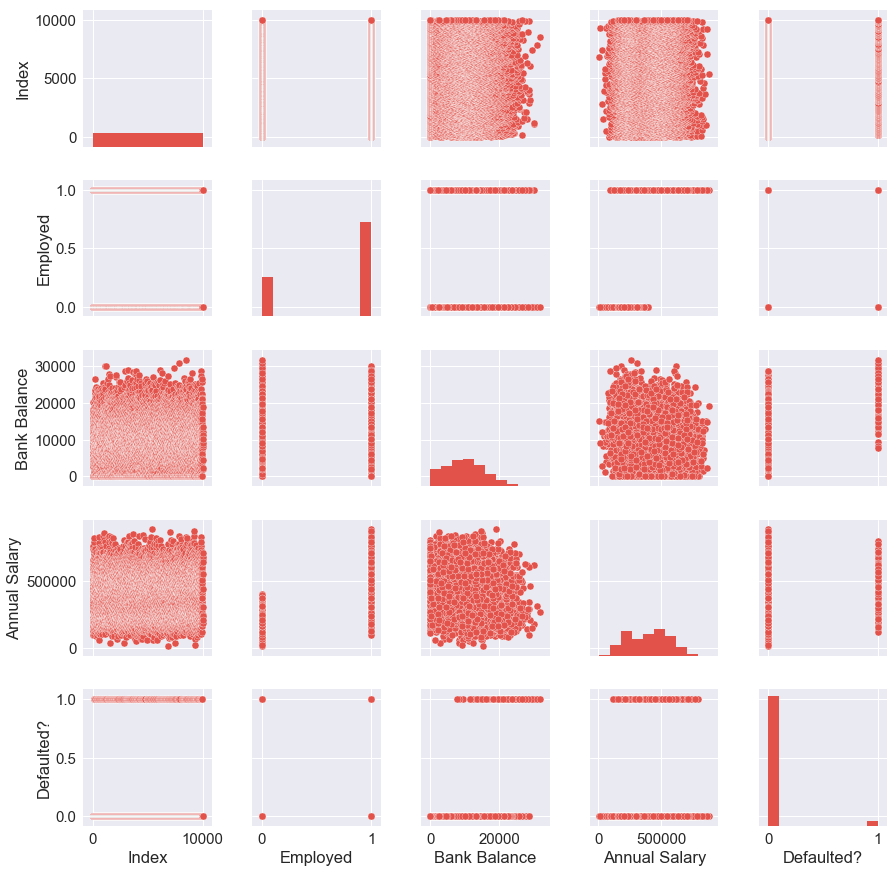

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral",font_scale = 1.5)

sns.pairplot(loan_default_data)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

target_variable = 'Defaulted?'
features_to_train_with = ['Employed', 'Bank Balance', 'Annual Salary']

X_train, X_test, y_train, y_test = train_test_split(loan_default_data[features_to_train_with], \
                                                    loan_default_data[target_variable], \
                                                    random_state = 0,test_size=0.25)

In [9]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

# instantiate the function into an object

clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5, \
                                     min_samples_split=10, max_features=None, random_state=0)


# fit the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
# predict
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba

array([[0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       ...,
       [0.99738861, 0.00261139],
       [0.99738861, 0.00261139],
       [0.9484375 , 0.0515625 ]])

## Evaluation

In [12]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.972


In [13]:
y_pred_train = clf.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
print('Training-set accuracy score: {}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9748


## Confusion matrix

In [15]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm = pd.DataFrame(cm, columns=['model says 0', 'model says 1'], index=['we know 0', 'we know 1'])
cm

,model says 0,model says 1
we know 0,2394,10
we know 1,60,36


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision_score(y_true=y_test, y_pred=y_pred)

0.782608695652174

In [17]:
recall_score(y_true=y_test, y_pred=y_pred)

0.375

In [18]:
f1_score(y_true=y_test, y_pred=y_pred)

0.5070422535211269

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2404
          1       0.78      0.38      0.51        96

avg / total       0.97      0.97      0.97      2500



# ROC-AUC

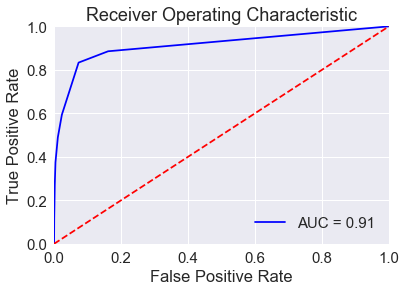

In [20]:
from sklearn.metrics import roc_curve, auc
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Threshold Manipulation

In [21]:
import numpy as np
def custom_classification_report(*, y_true, predicted_probas, percentile) -> None:
    '''
    Comments here
    '''
    # Extract default probability
    event_proba = predicted_probas[:,1]

    # Set threshold basis percentile margin
    threshold = pd.Series(event_proba[y_true.values == 1]).quantile(1 - percentile, interpolation="lower")

    # Regenerate predictions based on threshold
    new_predictions = np.where(event_proba > threshold, 1, 0)

    # Print threshold
    print('The threshold at percentile {} is: {}\n\n'.format(percentile,threshold))
    
    # Desired output - classification report
    print(classification_report(y_true, new_predictions))
    
    # Nothing returned
    return None

In [22]:
# Credit Risk based approach 
custom_classification_report(y_true=y_test, predicted_probas=clf.predict_proba(X_test), percentile=0.90)

The threshold at percentile 0.9 is: 0.0026113921984658073


             precision    recall  f1-score   support

          0       0.99      0.84      0.91      2404
          1       0.18      0.89      0.30        96

avg / total       0.96      0.84      0.89      2500

